b)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
gamma = 0.85
sigma = 0.1
N = 7
z_max = sigma * np.sqrt((N - 1) / (1 - gamma ** 2))
z = np.linspace(-z_max, z_max, N)
p = q = (1 + gamma) / 2
Pi = np.array([[p, 1 - p], [1 - p, p]])
Pi_new = np.zeros((N, N))
for n in range(3, N + 1):
    Pi_new = np.zeros((n, n))
    Pi_new[:-1, :-1] += p * Pi
    Pi_new[:-1, 1:] += (1 - p) * Pi
    Pi_new[1:, :-1] += (1 - p) * Pi
    Pi_new[1:, 1:] += p * Pi
    Pi_new[1:-1, :] /= 2
    Pi = Pi_new

print("Final transition matrix:")
print(z)
print(Pi)


Final transition matrix:
[-0.46499055 -0.3099937  -0.15499685  0.          0.15499685  0.3099937
  0.46499055]
[[6.26398049e-01 3.04734186e-01 6.17704431e-02 6.67788574e-03
  4.06087646e-04 1.31704102e-05 1.77978516e-07]
 [5.07890310e-02 6.46988197e-01 2.57284098e-01 4.14510205e-02
  3.34991821e-03 1.35540527e-04 2.19506836e-06]
 [4.11802954e-03 1.02913639e-01 6.59504720e-01 2.07171636e-01
  2.49249353e-02 1.33996729e-03 2.70725098e-05]
 [3.33894287e-04 1.24353062e-02 1.55378727e-01 6.63704146e-01
  1.55378727e-01 1.24353062e-02 3.33894287e-04]
 [2.70725098e-05 1.33996729e-03 2.49249353e-02 2.07171636e-01
  6.59504720e-01 1.02913639e-01 4.11802954e-03]
 [2.19506836e-06 1.35540527e-04 3.34991821e-03 4.14510205e-02
  2.57284098e-01 6.46988197e-01 5.07890310e-02]
 [1.77978516e-07 1.31704102e-05 4.06087646e-04 6.67788574e-03
  6.17704431e-02 3.04734186e-01 6.26398049e-01]]


c)

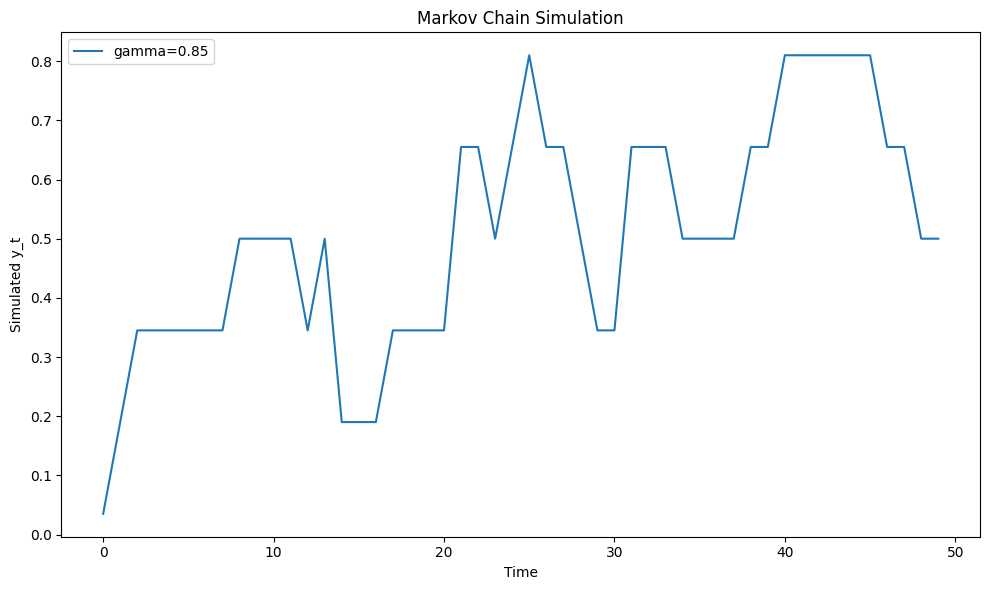

In [ ]:
np.random.seed(2025)
def simulate_markov_chain(z_grid, Pi, T=50, init_dist=None):
    N = len(z_grid)
    if init_dist is None:
        init_dist = np.ones(N) / N


    # Draw initial state index according to init_dist
    initial_state = np.random.choice(np.arange(N), p=init_dist)
    states = np.zeros(T, dtype=int)
    states[0] = initial_state

    for t in range(1, T):
    # Transition from states[t-1] with row Pi[states[t-1], :]
        current_state = states[t-1]
        next_state = np.random.choice(np.arange(N), p=Pi[current_state, :])
        states[t] = next_state

    # Map state indices to actual z-values
    z_vals = z_grid[states]
    return states, z_vals
if __name__ == "__main__":

    gamma = 0.85
    sigma = 1.0
    N = 7
    T = 50

    plt.figure(figsize=(10, 6))
    states, z_vals = simulate_markov_chain(z, Pi, T=T)
    y_vals = 0.5 + z_vals

    # Plot
    plt.plot(y_vals, label=f"gamma={gamma}")

    plt.title("Markov Chain Simulation")
    plt.xlabel("Time")
    plt.ylabel("Simulated y_t")
    plt.legend()
    plt.tight_layout()
    plt.show()
